In [7]:
## Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas 
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('paper')
import re
import csv
import json
import time
from scipy import stats
import numpy as np

## Analyze single samples. Code to compare two word distributions

In [8]:
topics = glob.glob('../data/sampling/*')

In [9]:
for t in topics:
    print(t)

../data/sampling/climate_change
../data/sampling/community_policing
../data/sampling/deep_state
../data/sampling/ebola
../data/sampling/gun_violence
../data/sampling/immigration
../data/sampling/network_neutrality
../data/sampling/teen_pregnancy
../data/sampling/us_election
../data/sampling/vaccines


## First plot raw counts

empty
empty
empty
empty


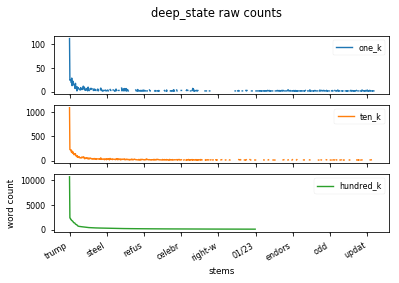

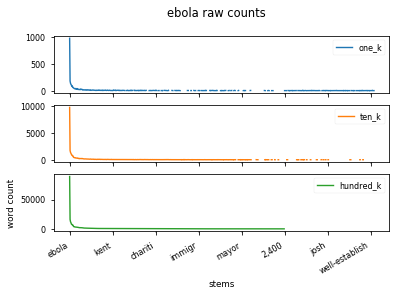

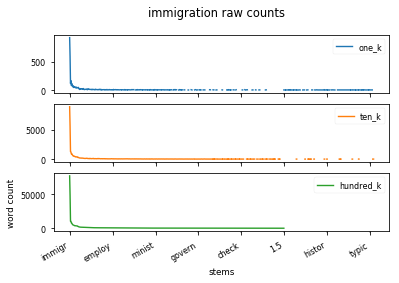

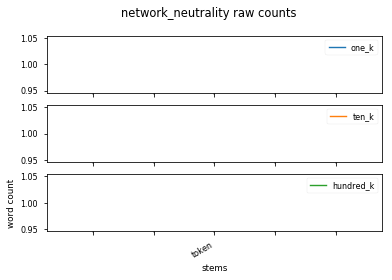

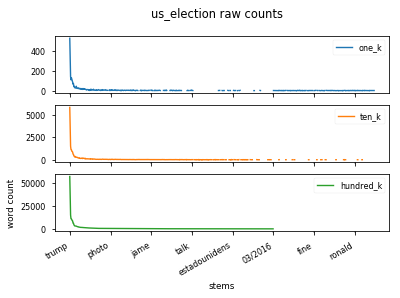

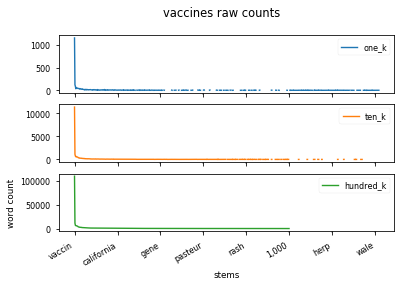

In [41]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0])
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0])
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0])
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        print("empty")
        continue
        
    #preprocssing
    one_k = one_k.set_index('stem')
    ten_k = ten_k.set_index('stem')
    hundred_k = hundred_k.set_index('stem') 
        
    combined = pandas.concat([one_k['count'],
            ten_k['count'],
            hundred_k['count']], 
            axis=1)
    
    combined.columns = ['one_k','ten_k','hundred_k']
    
    combined = combined.sort_values('hundred_k',ascending=False) 
    combined.to_csv('../data/raw-counts/' + topic_name + "-raw.csv")
         
    combined.plot(subplots=True, title=topic_name + ' raw counts')
    #plt.tight_layout()
    plt.xlabel("stems")
    plt.ylabel("word count") 
    plt.savefig('../fig/raw-plots/' + topic_name + '-raw.png')
     

## Now, convert to freq

## Creating ranking tables

empty
empty
empty
empty


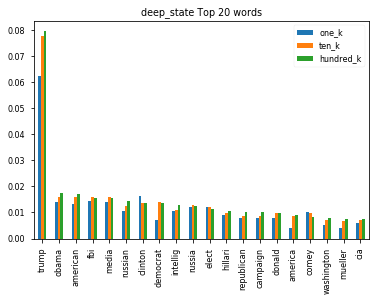

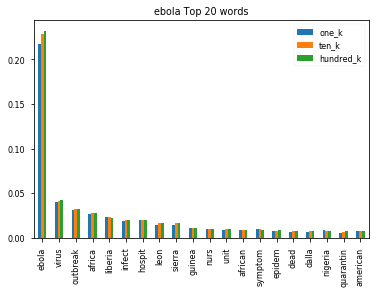

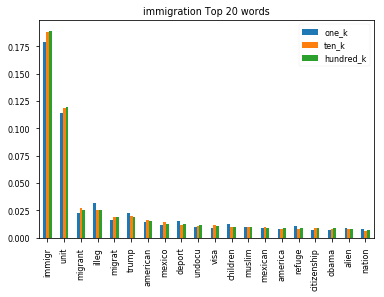

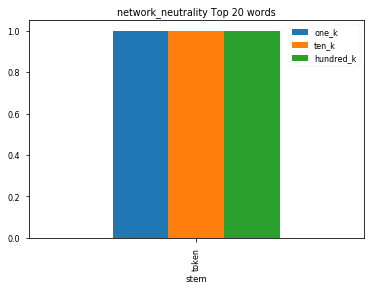

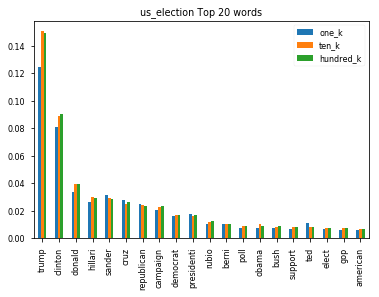

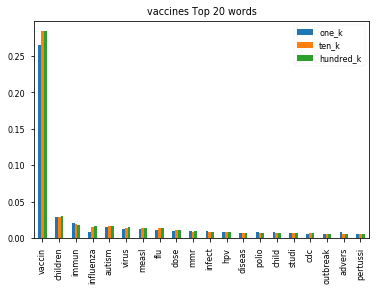

In [37]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0])
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0])
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0])
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        print("empty")
        continue
        
    #preprocssing
    one_k = one_k.set_index('stem')
    ten_k = ten_k.set_index('stem')
    hundred_k = hundred_k.set_index('stem') 
             
        
    one_k['freq'] = one_k['count']/one_k['count'].sum().astype(np.float64)
    ten_k['freq'] = ten_k['count']/ten_k['count'].sum().astype(np.float64)
    hundred_k['freq'] = hundred_k['count']/hundred_k['count'].sum().astype(np.float64)
   
    combined = pandas.concat([one_k['freq'],
               ten_k['freq'],
                hundred_k['freq']], 
              axis=1)

    combined.columns = ['one_k','ten_k','hundred_k'] 
    
    combined = combined.sort_values('hundred_k',ascending=False) 
    combined.to_csv('../data/freq/' + topic_name + "-freq.csv")
         
#     combined.plot(subplots=False, title=topic_name + ' normalized')
#     #plt.tight_layout()
#     plt.xlabel("stems")
#     plt.ylabel("word count") 
#     plt.savefig('../fig/norm-plots/' + topic_name + '-norm.png')
     
    combined[:20].plot(subplots=False, kind='bar', title=topic_name + ' Top 20 words')
    #plt.ylim([0,1])
    plt.savefig('../fig/top-twenty/' + topic_name + '-freq.png')
    
     
    

## Comparing ranked lists.
### For each topic, how many similarities in top 100 words?

In [148]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0], index_col=0)
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0], index_col=0)
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0], index_col=0)
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        #print("empty")
        continue
        
    # just in case, sort!
    one_k.sort_values('count', ascending=False, inplace=True)
    ten_k.sort_values('count', ascending=False, inplace=True)
    hundred_k.sort_values('count', ascending=False, inplace=True) 
    
    combined = pandas.concat([one_k.stem,
               ten_k.stem,
                hundred_k.stem], 
              axis=1)
    
    combined.columns = ['one_k','ten_k','hundred_k']
    combined.to_csv('../data/ranks/' + topic_name + '-rank.csv')
    
    print()
    print(topic_name)
    print("Number of stems in 1K, 10K, 100K samples:", 
          len(list(one_k.stem)), len(list(ten_k.stem)), len(list(hundred_k.stem)))
    
    print("Stems in 100K sample not in 1K sample:", len(set(hundred_k.stem) - set(one_k.stem)))
    print("Stems in 100K sample not in 10K sample:", len(set(hundred_k.stem) - set(ten_k.stem)))
    print()
    print("Top 100 stems in 100K sample not in 1K sample:", len(set(hundred_k.stem[:100]) - set(one_k.stem[:100])))
    print("Top 100 stems in 100K sample not in 10K sample:", len(set(hundred_k.stem[:100]) - set(ten_k.stem[:100])))
    print()
    print("Top 50 stems in 100K sample not in 1K sample:", len(set(hundred_k.stem[:50]) - set(one_k.stem[:50])))
    print("Top 50 stems in 100K sample not in 10K sample:", len(set(hundred_k.stem[:50]) - set(ten_k.stem[:50])))
    print()
    print("Top 10 stems in 100K sample not in 1K sample:", len(set(hundred_k.stem[:10]) - set(one_k.stem[:10])))
    print("Top 10 stems in 100K sample not in 10K sample:", len(set(hundred_k.stem[:10]) - set(ten_k.stem[:10])))
    
    
    
    
    
    print()
    


deep_state
Number of stems in 1K, 10K, 100K samples: 500 500 500
Stems in 100K sample not in 1K sample: 240
Stems in 100K sample not in 10K sample: 107

Top 100 stems in 100K sample not in 1K sample: 33
Top 100 stems in 100K sample not in 10K sample: 16

Top 50 stems in 100K sample not in 1K sample: 15
Top 50 stems in 100K sample not in 10K sample: 4

Top 10 stems in 100K sample not in 1K sample: 1
Top 10 stems in 100K sample not in 10K sample: 1


ebola
Number of stems in 1K, 10K, 100K samples: 500 500 500
Stems in 100K sample not in 1K sample: 172
Stems in 100K sample not in 10K sample: 63

Top 100 stems in 100K sample not in 1K sample: 21
Top 100 stems in 100K sample not in 10K sample: 7

Top 50 stems in 100K sample not in 1K sample: 7
Top 50 stems in 100K sample not in 10K sample: 2

Top 10 stems in 100K sample not in 1K sample: 0
Top 10 stems in 100K sample not in 10K sample: 0


immigration
Number of stems in 1K, 10K, 100K samples: 500 500 500
Stems in 100K sample not in 1K samp

## Compute ranking correlations
- for rankDCG: https://github.com/dkaterenchuk/ranking_measures
- for kendall's tau: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weightedtau.html#scipy.stats.weightedtau


In [241]:
from scipy.stats import weightedtau

In [246]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0], index_col=0)
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0], index_col=0)
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0], index_col=0)
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        #print("empty")
        continue
        
    # just in case, sort!
    one_k.sort_values('count', ascending=False, inplace=True)
    ten_k.sort_values('count', ascending=False, inplace=True)
    hundred_k.sort_values('count', ascending=False, inplace=True) 
    
    ## first, we have to remove any stems from the 10K and 1K samples that aren't in the 100K one, and vice versa.
    intersect_onek = set(hundred_k.stem).intersection(set(one_k.stem))
    hundred_k_rank = list(hundred_k[hundred_k.stem.isin(intersect_onek)].index)
    one_k_rank = [hundred_k.index[hundred_k.stem==stem][0] \
     if stem in list(hundred_k.stem) \
     else -1 for stem in list(one_k[one_k.stem.isin(intersect_onek)].stem)]
    
    print(topic_name, "weighted tau correlation")
    print("1K:", weightedtau(hundred_k_rank, one_k_rank).correlation)
    
    # now do 10k
    intersect_tenk = set(hundred_k.stem).intersection(set(ten_k.stem))
    hundred_k_rank = list(hundred_k[hundred_k.stem.isin(intersect_tenk)].index)
    
    ten_k_rank = [hundred_k.index[hundred_k.stem==stem][0] \
     if stem in list(hundred_k.stem) \
     else -1 for stem in list(ten_k[ten_k.stem.isin(intersect_tenk)].stem)]
     
    print("10K:", weightedtau(hundred_k_rank, ten_k_rank).correlation)
    print()

deep_state weighted tau correlation
1K: 0.375585136865
10K: 0.642364754369

ebola weighted tau correlation
1K: 0.524584171491
10K: 0.733821794584

immigration weighted tau correlation
1K: 0.553107835632
10K: 0.734835638535

network_neutrality weighted tau correlation
1K: nan
10K: nan

us_election weighted tau correlation
1K: 0.485222580615
10K: 0.729278191754

vaccines weighted tau correlation
1K: 0.495823686407
10K: 0.749367988452

